### 1. Notebook Introduction

This notebook main goal is studying Shannon's Entropy Through Image Segmentation based on references indicated below:

[1] Yan He, Liu Jie, Yang Dehong, Wang Pu. *An Improved Algorithm of the Maximum Entropy Image Segmentation.* 2014 Fifth International Conference on Intelligent Systems Design and Engineering Applications


### Understanding Shannon's Entropy
source: https://github.com/jonasmaziero/mecanica_quantica

Para propor uma função que quantifique a informação que adquirimos ao tomar conhecimento do valor de uma variável aleatória, Shannon começou notando que a informação que obtemos ao tomar conhecimento do acontecimento de um evento $X_{j}$ é proporcional à nossa surpresa, que é inversamente proporcional a probabilidade daquele evento ocorrer:
\begin{equation}
I(X_{j}) = \frac{1}{p_{j}},
\end{equation}
com $p_{j}=Pr(X_{j})$. No entanto, para dois eventos independentes, $X_{j}$ e $Y_{k}$, para os quais $Pr(X_{j},Y_{k})=p_{jk}=p_{j}p_{k}=Pr(X_{j})Pr(Y_{k})$, espera-se que a informação adquirida seja a soma das informações. Mas pela medida anterior
\begin{equation}
I(X_{j},Y_{k}) = \frac{1}{p_{jk}} = \frac{1}{p_{j}p_{k}} \ne \frac{1}{p_{j}} + \frac{1}{p_{k}} =I(X_{j})+I(Y_{k}).
\end{equation}
O uso da função logaritmo nos fornece a esperada aditividade, i.e., definindo
\begin{equation}
I(X_{j})=\log_{2}\left(\frac{1}{p_{j}}\right) = \log_{2}\left(p_{j}^{-1}\right) = - \log_{2}(p_{j}).
\end{equation}
obtemos 
\begin{equation}
I(X_{j},Y_{k}) = -\log_{2}(p_{jk}) = -\log_{2}(p_{j}p_{k}) = -\log_{2}(p_{j})-\log_{2}(p_{k}) = I(X_{j})+I(Y_{k}).
\end{equation}

Para uma variável aleatória $X$ que pode assumir os valores $X_{1},\cdots,X_{n}$ com probabilidades $p_{1},\cdots,p_{n}$, a quantidade de informação que obtemos ao tomar conhecimento do valor de $X$, ou, de forma equivalente, nossa incerteza sobre $X$ antes de saber do seu valor, pode ser obtida pela média da informação que obtemos ao tomar conhecimento que cada um dos seus valores aconteceu:
\begin{equation}
H(X)=\sum_{j}p_{j}I(X_{j}) = -\sum_{j}p_{j}\log_{2}(p_{j}).
\end{equation}
Essa função é chamada de entropia de Shannon, e sua interpretação como o número mínimo de bits de informação necessário para armazenar a informação de uma fonte que emite símbolos $\{X_{j}\}$ com probabilidade $\{p_{j}\}$ é um dos esteios da teoria matemática da informação.

OBS. Usamos $\log_{2}$ para medir entropia em bits.

OBS. Ao calcular $H$ usamos $\lim_{x\rightarrow 0} x\log x = 0$ para fazer $0\log 0 = 0$.

# Simple Exercice
1. Considere uma fonte de informação que emite os símbolos $\{X_{1},X_{2},X_{3},X_{4}\}$ com probabilidades respectivas $\{1/2,1/4,1/8,1/8\}$. Verifique que a entropia de Shannon dessa variável aleatória é $H(X)=7/4$.


Using definition:

\begin{equation}
H(X)=\sum_{j}p_{j}I(X_{j}) = -\sum_{j}p_{j}\log_{2}(p_{j}).
\end{equation}


Sum of all Probabilities: $\{1/2,1/4,1/8,1/8\}$= $\{7/4\}$

### Entropy Thresholding

* Maximum entropy 

Step 1:  findind the Optimal Threshold $T_{opt}$ as it follows:

$$T_{opt}=\text{arg max}(H_f(T)+H_b(T))$$
Where:
$$ H_f(T)=-\sum_{i=1}^{T}\frac{P(i)}{P(T)} \times log\frac{P(i)}{P(T)} $$
$$ H_b(T)=-\sum_{i=T}^{G}\frac{P(i)}{1-P(T)} \times log\frac{P(i)}{1-P(T)} $$


$G$: is the number of intensity levels

$p\in[0,255]$

$T \in [1, 254]$

In [1]:
### Import 

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import cv2
import numpy as np
from matplotlib import pyplot as plt

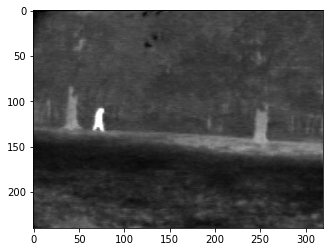

In [2]:
img = cv2.imread('000280.jpg')

#converting to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

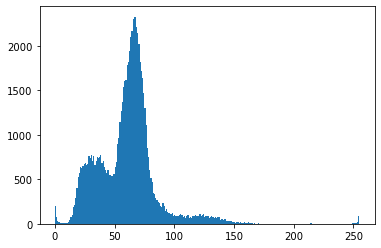

In [3]:
plt.figure()
plt.hist(img.flatten(), bins=np.arange(256))
plt.show()

In [4]:
# function to print grayscale image 

def imshow(img):
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.show()

In [5]:
# Helper function for calculating entropy
def entp(x):
    temp = np.multiply(x, np.log(x))
    temp[np.isnan(temp)] = 0
    return temp

Step 1:  findind the Optimal Threshold $T_{opt}$ as it follows:

$$T_{opt}=\text{arg max}(H_f(T)+H_b(T))$$
Where:
$$ H_f(T)=-\sum_{i=1}^{T}\frac{P(i)}{P(T)} \times log\frac{P(i)}{P(T)} $$
$$ H_b(T)=-\sum_{i=T}^{G}\frac{P(i)}{1-P(T)} \times log\frac{P(i)}{1-P(T)} $$


$G$: is the number of intensity levels

$p\in[0,255]$

$T \in [1, 254]$

To simplify the implementation, we create a separate variable $\theta(T)=H_f(T)+H_b(T)$. The optimal threshold then becomes $\text{arg max}(\theta(T))$.

In [6]:
# Maximum entropy
H = cv2.calcHist([img],[0],None,[256],[0,256])
H = H / np.sum(H)

In [7]:
theta = np.zeros(256)
Hf = np.zeros(256)
Hb = np.zeros(256)

for T in range(1,255):
    Hf[T] = - np.sum( entp(H[:T-1] / np.sum(H[1:T-1])) )
    Hb[T] = - np.sum( entp(H[T:] / np.sum(H[T:])) )
    theta[T] = Hf[T] + Hb[T]

theta_max = np.argmax(theta)
img_out = img > theta_max

In [8]:
print("Hf[H] é: ", Hf[T])
print("Hb[T] é: ", Hb[T])
print("soma de  Hf[T] +  Hb[T]: ", theta[T])
print("Threshold é: ", theta_max)

Hf[H] é:  4.423211097717285
Hb[T] é:  0.36502310633659363
soma de  Hf[T] +  Hb[T]:  4.788234204053879
Threshold é:  92


Text(102, 0, '$T_{opt}$')

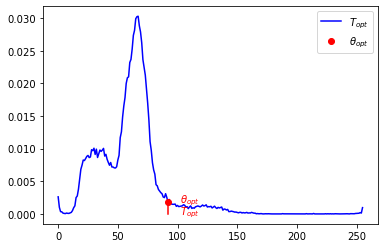

In [23]:
# Show histogram
plt.plot([i for i in range(256)], H, 'b')
plt.plot([theta_max], [H[theta_max]], 'ro')
plt.plot([theta_max, theta_max], [0, H[theta_max]], 'r')

plt.legend(["$T_{opt}$", "$\\theta_{opt}$"])

plt.annotate("$\\theta_{opt}$", 
            xy=(theta_max, H[theta_max]), 
            xytext=(10+theta_max, H[theta_max]),
            color='r')

plt.annotate("$T_{opt}$", 
            xy=(theta_max, 0), 
            xytext=(10+theta_max, 0),
            color='r')

In [24]:
theta_max

92

In [15]:
H[theta_max]

array([0.0018099], dtype=float32)

The threshold value is:  92


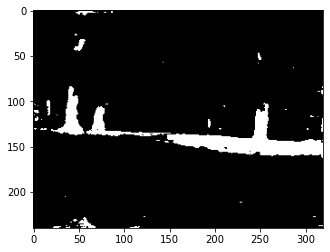

In [16]:
# Show image

def imshow(img):
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.show()

print("The threshold value is: ", theta_max)
imshow(img_out * 255)